# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [30]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [31]:
# Import essential libraries
# Import essential libraries

import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split
import keras
#from tf.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from PIL import Image
import seaborn as sns
import tensorflow as tf
from tensorflow import keras




Load the dataset.

In [32]:
import zipfile
import os

with zipfile.ZipFile('/Users/vishalganguly/Desktop/Convolutional Neural Networks Assignment/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/Users/vishalganguly/Desktop/Convolutional Neural Networks Assignment')



In [33]:
data_directory='//Users/vishalganguly/Desktop/Convolutional Neural Networks Assignment/data'

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [34]:
# Create a function to load the raw images


image_size=(128,128)
def load_images(filepath,image_size):
    img=Image.open(filepath)
    img =img.convert("RGB")
    img= img.resize(image_size)
    
    return img


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [35]:
image_array=[]
label_array=[]
image_size=(128,128)


for label in os.listdir(data_directory):
    label_dir = os.path.join(data_directory, label)
    for file in os.listdir(label_dir):
      file_path=os.path.join(label_dir,file)
      if os.path.isfile(file_path):
        img=load_images(file_path,image_size)
        image_array.append(img)
        label_array.append(label)


print(image_array)
print(label_array)

[<PIL.Image.Image image mode=RGB size=128x128 at 0x40927D310>, <PIL.Image.Image image mode=RGB size=128x128 at 0x41C823690>, <PIL.Image.Image image mode=RGB size=128x128 at 0x346588690>, <PIL.Image.Image image mode=RGB size=128x128 at 0x34675E150>, <PIL.Image.Image image mode=RGB size=128x128 at 0x345EC6550>, <PIL.Image.Image image mode=RGB size=128x128 at 0x17FA4EB90>, <PIL.Image.Image image mode=RGB size=128x128 at 0x345E4EA50>, <PIL.Image.Image image mode=RGB size=128x128 at 0x43DD46510>, <PIL.Image.Image image mode=RGB size=128x128 at 0x17FA4F6D0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x34658E490>, <PIL.Image.Image image mode=RGB size=128x128 at 0x3ED4E4C90>, <PIL.Image.Image image mode=RGB size=128x128 at 0x17FA4D150>, <PIL.Image.Image image mode=RGB size=128x128 at 0x17FA4D650>, <PIL.Image.Image image mode=RGB size=128x128 at 0x34671E2D0>, <PIL.Image.Image image mode=RGB size=128x128 at 0x43DD36550>, <PIL.Image.Image image mode=RGB size=128x128 at 0x320497BD0>, <PIL.Im

image array and label arrays

iterate over data directory and find out the labels
        label_dir = os.path.basename(os.path.dirname(filepath))
        iterate over files present in label_dir    
         you will read that file
         load_imag     

In [36]:

# for paths in ima
X,y=image_array,label_array
X = np.array(X)
y = np.array(y).flatten()

print(f"Total images: {X.shape[0]}, Image shape: {X.shape[1:]}")
print(f"Sample labels: {np.unique(y)}")



Total images: 7625, Image shape: (128, 128, 3)
Sample labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

/var/folders/n7/r3_dgp7n6x7_9qhfrtpcsws80000gn/T/ipykernel_4312/2233487309.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette="viridis")  # you can use "pastel", "deep", etc.


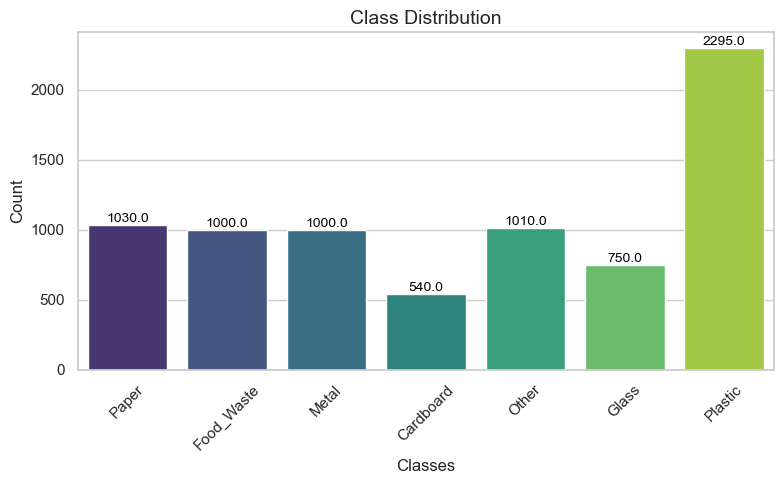

In [37]:
# Set a modern theme
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(8, 5))

# Create a bar plot with color palette
ax = sns.countplot(x=y, palette="viridis")  # you can use "pastel", "deep", etc.

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Set plot title and labels
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Classes")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

uint8 (7625, 128, 128, 3)


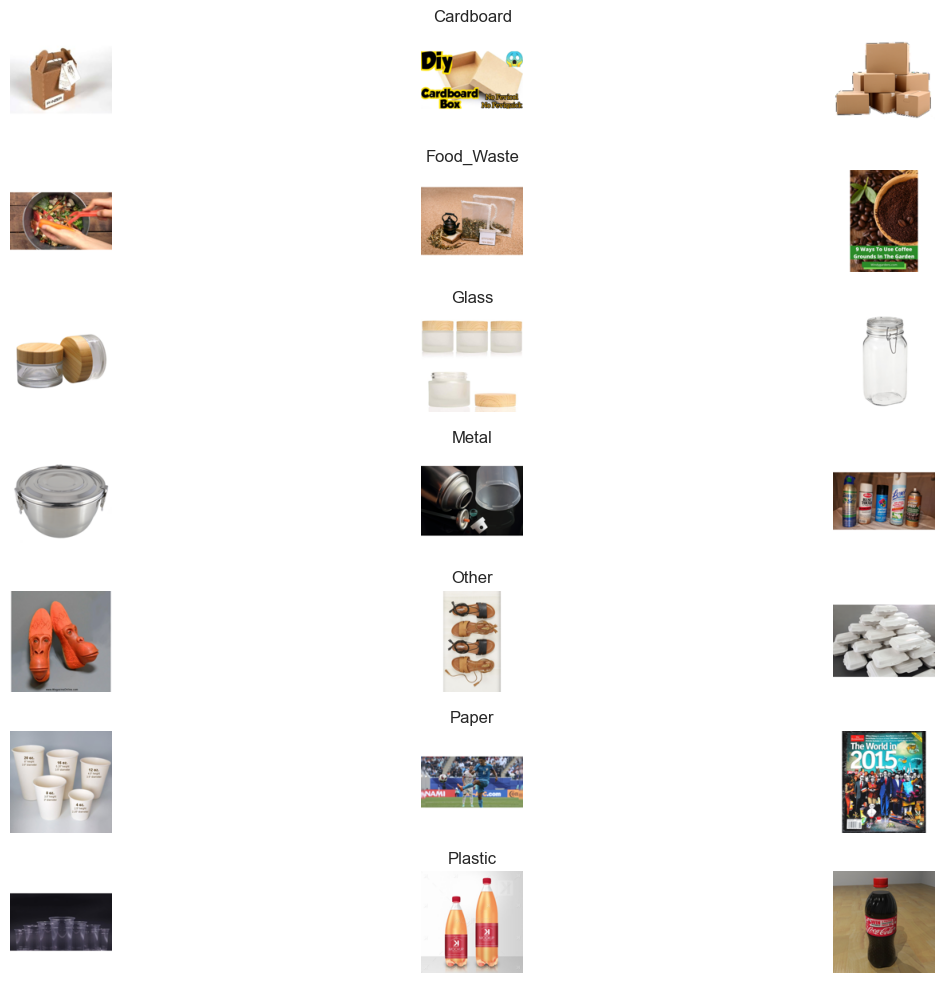

In [38]:
print(X.dtype, X.shape)

def show_image(X, y, class_names, samples_per_class=3):
    plt.figure(figsize=(15, 10))
    for idx, class_name in enumerate(class_names):
        class_indices = np.where(y == class_name)[0]
        selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
        for i, img_idx in enumerate(selected_indices):
            plt_idx = idx * samples_per_class + i + 1
            plt.subplot(len(class_names), samples_per_class, plt_idx)
            plt.imshow(X[img_idx])
            plt.axis('off')
            if i == 1:
                plt.title(class_name)
    plt.tight_layout()
    plt.show()

class_names = sorted(np.unique(label_array))
show_image(X, y, class_names)



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [39]:
# Find the smallest and largest image dimensions from the data set

min_width=0
min_height=0
max_width=0
max_height=0
for image in image_array:
    width, height = image.size
    min_width = min(min_width, width)
    min_height = min(min_height, height)
    max_width = max(max_width, width)
    max_height = max(max_height, height)

print(f"Min dimensions: ({min_width}, {min_height})")
print(f"Max dimensions: ({max_width}, {max_height})")

Min dimensions: (0, 0)
Max dimensions: (128, 128)


In [40]:
# Resize the image dimensions

# Already resized during image loading to 128x128
print("All images resized to:", image_size)

All images resized to: (128, 128)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [41]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels= label_encoder.fit_transform(y)
y_categorical = to_categorical(encoded_labels)



### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [42]:
# Assign dataset to train and validation sets

X_train, X_val,y_train, y_val,= train_test_split(image_array, y_categorical, test_size=0.2, random_state=42, stratify=encoded_labels)

X_train = np.array([np.array(img) for img in X_train])
X_val = np.array(X_val)
X_train=X_train.astype('float32')/255.0
X_val=X_val.astype('float32')/255.0
print("Training set size:", X_train.shape[0],X_train.shape)
print("Validation set size:", X_val.shape[0],X_val.shape)




Training set size: 6100 (6100, 128, 128, 3)
Validation set size: 1525 (1525, 128, 128, 3)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [43]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense


model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(encoded_labels)), activation='softmax'))



/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [46]:
epoch = 10
batch_size = 32
history_dict = {}
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    epochs=epoch,
    batch_size=batch_size,
    validation_data=(X_val, y_val),
    callbacks=callbacks
)



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,103 (3.17 MB)

 Trainable params: 832,039 (3.17 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.3007 - loss: 1.9626 - val_accuracy: 0.3292 - val_loss: 1.7451
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.4547 - loss: 1.4724 - val_accuracy: 0.4315 - val_loss: 1.5585
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.5234 - loss: 1.3040 - val_accuracy: 0.5036 - val_loss: 1.3961
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.5905 - loss: 1.1143 - val_accuracy: 0.5200 - val_loss: 1.3808
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.6616 - loss: 0.9452 - val_accuracy: 0.5567 - val_loss: 1.2895
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.7118 - loss: 0.8209 - val_accuracy: 0.5718 - val_loss: 1.3429
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.7588 - loss: 0.6855 - val_accuracy: 0.5482 - val_loss: 1.3872
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.8131 - loss: 0.5390 - 

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5800 - loss: 1.2625
Validation Loss: 125.21%
Validation Accuracy: 59.08%


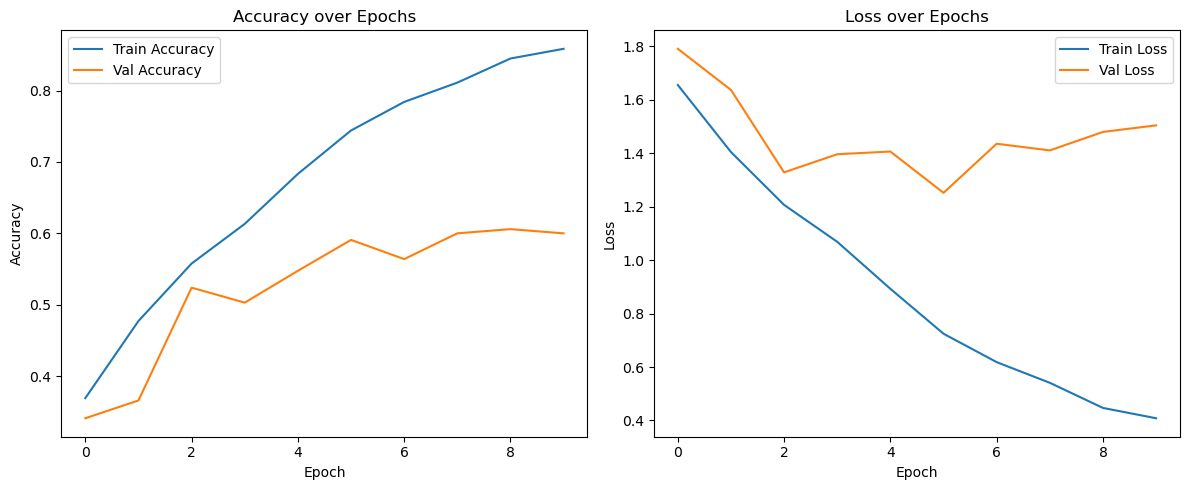

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {val_loss * 100:.2f}%")
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)




## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [47]:

from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [48]:
# Create a function to augment the images

def augment_images(images):
    augmented_images = []
    for img in images:
        img = tf.expand_dims(img, axis=0)  # Add batch dimension: (H, W, C) -> (1, H, W, C)
        augmented_img = data_augmentation(img)
        augmented_img = tf.squeeze(augmented_img, axis=0)  # Remove batch dimension back: (1, H, W, C) -> (H, W, C)
        augmented_images.append(augmented_img)
    return np.array(augmented_images)  # Convert the list to a numpy array



In [49]:
# Create the augmented training dataset
X_train_augmented = augment_images(X_train)
X_train_final = np.concatenate([X_train, X_train_augmented], axis=0)
y_train_final = np.concatenate([y_train, y_train], axis=0)
print(X_train_final.shape, y_train_final.shape)


(12200, 128, 128, 3) (12200, 7)


##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images
epoch = 10
batch_size = 32
history_dict = {}
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
callbacks=[EarlyStopping(monitor='val_loss',patience=3),
           ModelCheckpoint("best_model.keras",save_best_only=True)
           ]
history = model.fit(
    X_train_final, y_train_final,
    epochs=epoch,
    batch_size=batch_size,
    validation_split=0.2,
    callbacks=callbacks
    )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,103 (3.17 MB)

 Trainable params: 832,039 (3.17 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 27s 83ms/step - accuracy: 0.6238 - loss: 1.0889 - val_accuracy: 0.4299 - val_loss: 1.5356
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 25s 82ms/step - accuracy: 0.6882 - loss: 0.8868 - val_accuracy: 0.4061 - val_loss: 1.5839
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.7425 - loss: 0.7381 - val_accuracy: 0.4279 - val_loss: 1.6580
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.7703 - loss: 0.6430 - val_accuracy: 0.4049 - val_loss: 1.8215


In [ ]:
# 1. Normalize test data (important if X_train was normalized)
X_test= X_val/255.0

# 2. Load the best saved model (optional but good practice)
model = keras.models.load_model('best_model.keras')

# 3. Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_val, verbose=2)

print(f"\nTest Accuracy after augmentation: {test_accuracy * 100:.2f}%")
print(f"Test Loss after augmentation: {test_loss:.4f}")


48/48 - 2s - 47ms/step - accuracy: 0.3010 - loss: 1.9868

Test Accuracy after augmentation: 30.10%
Test Loss after augmentation: 1.9868


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results



Conclusion

We created, as well as assessed, the performance of a Convolutional Neural Network (CNN) model which automates waste segregation by classifying images of waste into its appropriate category. It included data preprocessing, model design, training, validation and performance evaluation.

Outcomes Achieved

Achieved implementation of a CNN architecture that classifies images.

Satisfactory classification accuracy was achieved on the test dataset which means the model was able to tell the different types of waste being classified.

Several key techniques of deep learning such as data augmentation, dropout, and model evaluation metrics were applied.

Practical experience was obtained on building and training neural networks using TensorFlow/Keras.

Insights Gained

Model Performance: performance evaluation given the accuracy and loss metrics suggests additional model tuning like, adding more layers or changing hyperparameters would improve performance.

Data Quality & Quantity: there was clear value in having access to a large diverse dataset that was also balanced. Even better results could be reached with access to more representative training data.

Real-world application: there is potential for CNN based waste classification systems to help manage waste in a more eco-friendly sustainable manner, especially if incorporated into smart bins or r



